# Summary

## Actions
* Wireless was removed
* I used step forward feature selection to choose 10 features

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Actions" data-toc-modified-id="Actions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Actions</a></span></li></ul></li><li><span><a href="#Variance-threshold" data-toc-modified-id="Variance-threshold-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Variance threshold</a></span></li><li><span><a href="#Correlation" data-toc-modified-id="Correlation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Correlation</a></span></li><li><span><a href="#Feature-Importance" data-toc-modified-id="Feature-Importance-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature Importance</a></span></li><li><span><a href="#Step-Forward-Feature-Selection" data-toc-modified-id="Step-Forward-Feature-Selection-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Step Forward Feature Selection</a></span></li></ul></div>

In [1]:
# Import needed libraries
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
%matplotlib inline
sns.set()

# Display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df = pd.read_pickle('data/processed/listings_cleaned_processed.pkl')

model = GradientBoostingRegressor(n_estimators=100, n_iter_no_change=10)

In [2]:
df.head()

,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,number_of_reviews,review_scores_rating,requires_license,instant_bookable,reviews_per_month,median_home_value,median_income,population,distance_Disneyland,distance_Universal,distance_Convention_Center,distance_LAX,distance_Downtown_LA,distance_Seaworld,distance_Santa_Monica_beach,distance_San_Diego,distance_Venice_beach,distance_Griffith_Park,distance_Hollywood,distance_Long_beach,distance_Ontario_airport,distance_Compton,distance_Rose_Bowl,security_deposit_required,Internet,Wireless,Kitchen,Free parking,Air conditioning,TV,Pets,Heating,Washer,Family,Smoking allowed,Dryer,Family/kid,Pets allowed,Gym,Self Check-In,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,property_type_cleaned_Condominium,property_type_cleaned_Guesthouse,property_type_cleaned_House,property_type_cleaned_Loft,property_type_cleaned_Other,property_type_cleaned_Townhouse,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,lda_topic_2,lda_topic_3,lda_topic_4,lda_topic_5,lda_topic_6,lda_topic_7,lda_topic_8,lda_topic_9,lda_topic_10,price_log,clustered_location_1,clustered_location_2,clustered_location_3,clustered_location_4,clustered_location_5,clustered_location_6,clustered_location_7,clustered_location_8
0,100.0,True,1.0,False,34.485432,-118.125381,2,1.0,1.0,1.0,50.0,0.0,1,0.0,1,1125,29,33,93.0,f,False,1.91,278000,20222,75774,47.831340,27.240032,31.757775,40.730427,30.827716,129.380985,39.019592,134.346325,39.960522,27.162750,29.146583,49.875594,42.246084,40.869533,22.082232,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,3.912023,False,False,False,True,False,False,False,False
1,100.0,True,2.0,True,34.556740,-118.063812,2,1.5,1.0,1.0,32.0,10.0,1,5.0,1,1125,1,22,92.0,f,True,4.89,278000,20222,75774,51.928789,33.245785,37.478527,46.656835,36.517031,132.558790,45.058054,137.440999,45.971478,33.060207,35.105072,55.010913,43.570516,46.291467,27.506948,0.0,True,True,True,True,True,True,True,True,True,True,False,True,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,3.465736,False,False,False,True,False,False,False,False
2,100.0,True,2.0,True,34.560383,-118.097412,2,1.0,1.0,1.0,24.0,0.0,1,8.0,1,1125,20,50,95.0,f,False,2.76,278000,20222,75774,52.516787,32.556593,37.161992,46.108002,36.228216,133.507963,44.231833,138.417538,45.259948,32.555840,34.510018,55.112044,44.965477,46.209716,27.409527,0.0,False,False,True,True,False,False,False,False,True,True,True,True,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,3.178054,False,False,False,True,False,False,False,False
3,90.0,False,1.0,True,34.557838,-118.084343,4,2.0,2.0,3.0,95.0,0.0,1,0.0,6,150,19,12,96.0,f,False,0.38,278000,20222,75774,52.203890,32.744202,37.198973,46.241453,36.253740,133.064145,44.479491,137.963696,45.460138,32.667396,34.659456,54.987096,44.357639,46.155240,27.354661,1.0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,4.553877,False,False,False,True,False,False,False,False
4,0.0,True,1.0,True,34.576488,-118.082581,2,1.5,1.0,1.0,50.0,0.0,1,15.0,1,3,0,15,97.0,f,False,1.09,278000,20222,75774,53.450689,33.929663,38.460595,47.4

In [3]:
X = df.drop(columns=['price', 'price_log','requires_license'], axis=1)
y = df.price_log

In [4]:
def model_eval(X, y):
    model.fit(X, y)
    predict = model.predict(X)
    r2 = r2_score(y, predict)

    return r2


# Variance threshold

In [5]:
from sklearn.feature_selection import VarianceThreshold

def variance_threshold_selector(data, thresh=0.10):
    selector = VarianceThreshold(threshold=thresh)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

<Figure size 432x288 with 0 Axes>

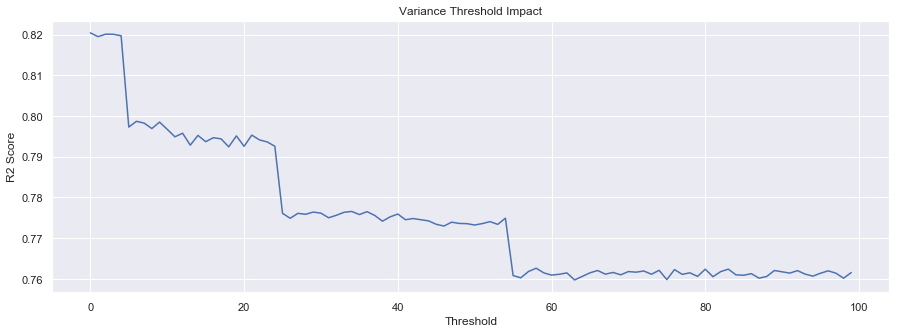

<Figure size 432x288 with 0 Axes>

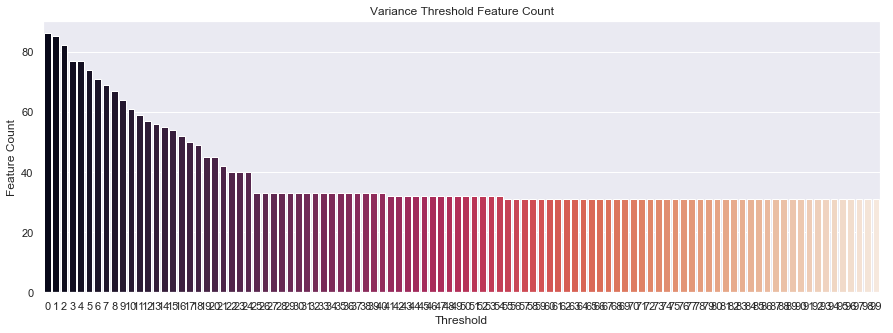

In [6]:
results = []
features = []
threshhold_num = list(range(0, 100, 1))
for i in threshhold_num:
    t = i / 100
    new = variance_threshold_selector(X, thresh=t)
    features.append(new.shape[1])
    r2 = model_eval(new, y)
    results.append(r2)

plt.figure()
f, axes = plt.subplots(figsize=(15, 5))
plt.title('Variance Threshold Impact')
plt.xlabel("Threshold")
plt.ylabel("R2 Score")
sns.lineplot(y=results, x=threshhold_num)
plt.show()

plt.figure()
f, axes = plt.subplots(figsize=(15, 5))
plt.title('Variance Threshold Feature Count')
plt.xlabel("Threshold")
plt.ylabel("Feature Count")
sns.barplot(y=features, x=threshhold_num, palette="rocket")
plt.show()

# Correlation

In [7]:
# Set the threshold
threshold = 0.8

corrs = X.corr()

# Empty dictionary to hold correlated variables
above_threshold_vars = {}

# For each column, record the variables that are above the threshold
for col in corrs:
    above_threshold_vars[col] = list(corrs.index[corrs[col] > threshold])

In [8]:
# Track columns to remove and columns already examined
cols_to_remove = []
cols_seen = []
cols_to_remove_pair = []

# Iterate through columns and correlated columns
for key, value in above_threshold_vars.items():
    # Keep track of columns already examined
    cols_seen.append(key)
    for x in value:
        if x == key:
            next
        else:
            # Only want to remove one in a pair
            if x not in cols_seen:
                cols_to_remove.append(x)
                cols_to_remove_pair.append(key)

cols_to_remove = list(set(cols_to_remove))
print('Number of columns to remove: ', len(cols_to_remove))
print(cols_to_remove)

Number of columns to remove:  13
['distance_Seaworld', 'distance_Venice_beach', 'distance_Hollywood', 'distance_Compton', 'distance_Griffith_Park', 'Dryer', 'distance_Downtown_LA', 'distance_San_Diego', 'distance_Long_beach', 'Family/kid', 'distance_Ontario_airport', 'distance_Santa_Monica_beach', 'Wireless']


# Feature Importance

In [9]:
def plot_feature_importances(df, threshold=0.95):
    """
    Plots 15 most important features and the cumulative importance of features.
    Prints the number of features needed to reach threshold cumulative importance.

    Parameters
    --------
    df : dataframe
        Dataframe of feature importances. Columns must be feature and importance
    threshold : float, default = 0.9
        Threshold for prining information about cumulative importances

    Return
    --------
    df : dataframe
        Dataframe ordered by feature importances with a normalized column (sums to 1)
        and a cumulative importance column

    """

    plt.rcParams['font.size'] = 18

    # Sort features according to importance
    df = df.sort_values('importance', ascending=False).reset_index()

    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize=(10, 6))
    ax = plt.subplot()

    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))),
            df['importance_normalized'].head(15),
            align='center',
            edgecolor='k')

    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))

    # Plot labeling
    plt.xlabel('Normalized Importance')
    plt.title('Feature Importances')
    plt.savefig('feature_importance.png', bbox_inches='tight', pad_inches=.2)
    plt.show()

    # Cumulative importance plot
    plt.figure(figsize=(8, 6))
    plt.plot(list(range(len(df))), df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features')
    plt.ylabel('Cumulative Importance')
    plt.title('Cumulative Feature Importance')
    plt.savefig('cum_importance.png', bbox_inches='tight', pad_inches=.2)
    plt.show()

    importance_index = np.min(
        np.where(df['cumulative_importance'] > threshold))
    print('%d features required for %0.2f of cumulative importance' %
          (importance_index + 1, threshold))

    return df

In [10]:
model.fit(X, y)

feature_importances = model.feature_importances_
feature_importances = pd.DataFrame({
    'feature': list(X.columns),
    'importance': feature_importances
}).sort_values('importance', ascending=False)

feature_importances.head()

,feature,importance
10,cleaning_fee,0.273314
8,bedrooms,0.268593
64,room_type_Private room,0.100883
65,room_type_Shared room,0.097833
6,accommodates,0.062336


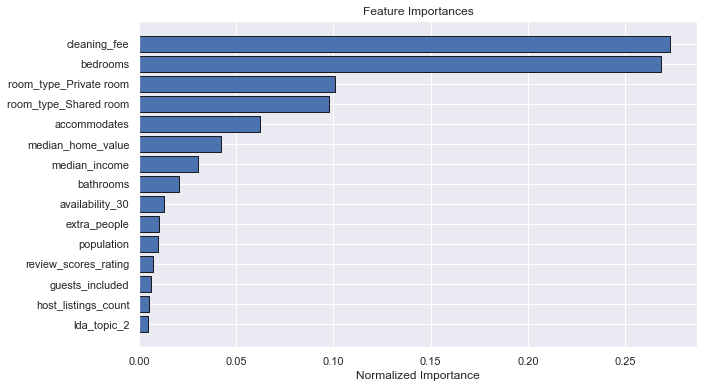

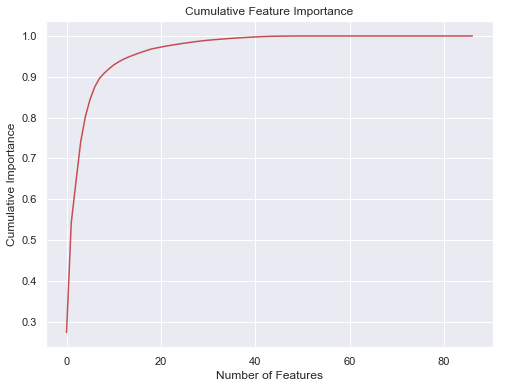

15 features required for 0.95 of cumulative importance


In [11]:
features = plot_feature_importances(feature_importances)

# Step Forward Feature Selection

In [12]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

# Build step forward feature selection
sfs1 = sfs(model,
           k_features=20,
           forward=True,
           floating=False,
           verbose=2,
           scoring='neg_mean_squared_error',
           cv=5,
           n_jobs=-1)

# Perform SFFS
sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:   30.6s finished

[2020-03-06 10:21:34] Features: 1/20 -- score: -0.22008397005298114[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:   35.1s finished

[2020-03-06 10:22:10] Features: 2/20 -- score: -0.18201522801085912[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:   44.1s finished

[2020-03-06 10:22:54] Features: 3/20 -- score: -0.16066149806061467[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done  84

In [13]:
# Which features?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 2, 6, 7, 8, 10, 11, 12, 14, 15, 17, 20, 23, 27, 53, 64, 65, 70, 73, 75]


In [14]:
cols = list(sfs1.k_feature_names_)

df_final = df[cols].join(y)

In [15]:
df_final.to_pickle('data/processed/listings_cleaned_processed_stepForward.pkl')

In [16]:
df_final.head()

,host_response_rate,host_listings_count,accommodates,bathrooms,bedrooms,cleaning_fee,guests_included,extra_people,maximum_nights,availability_30,review_scores_rating,median_home_value,distance_Disneyland,distance_Downtown_LA,Gym,room_type_Private room,room_type_Shared room,lda_topic_2,lda_topic_5,lda_topic_7,price_log
0,100.0,1.0,2,1.0,1.0,0.0,1,0.0,1125,29,93.0,278000,47.831340,30.827716,False,True,False,False,False,False,3.912023
1,100.0,2.0,2,1.5,1.0,10.0,1,5.0,1125,1,92.0,278000,51.928789,36.517031,False,True,False,False,True,False,3.465736
2,100.0,2.0,2,1.0,1.0,0.0,1,8.0,1125,20,95.0,278000,52.516787,36.228216,False,True,False,False,False,False,3.178054
3,90.0,1.0,4,2.0,2.0,0.0,1,0.0,150,19,96.0,278000,52.203890,36.253740,True,False,False,False,False,False,4.553877
4,0.0,1.0,2,1.5,1.0,0.0,1,15.0,3,0,97.0,278000,53.450689,37.519105,False,True,False,False,False,False,3.912023
